In [1]:
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import sys
import os
from glob import glob
import matplotlib.pyplot as plt
import torch
import torchvision
import time

In [2]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [3]:
device_id = 1
input_size = 640
model_path = "./model/modify_yolov5s_out.om"

In [4]:
model = Model(device_id, model_path, input_size, input_size)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 12, 320, 320]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'Reshape_259:0', 'dimCount': 5, 'dims': [1, 3, 85, 80, 80]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'Reshape_275:0', 'dimCount': 5, 'dims': [1, 3, 85, 40, 40]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'Reshape_291:0', 'dimCount': 5, 'dims': [1, 3, 85, 20, 20]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [16]:
img_dict = {"path": "./data/kite.jpg", "dtype": np.uint8}
img_org_bgr = cv2.imread(img_dict["path"])

In [17]:
%timeit -n 50 -r 10 
bboxes = model.run1(img_org_bgr)

image_np_expanded shape: (1, 12, 320, 320)
img_numpy shape: (1, 12, 320, 320)
107729520
img_buf_size 4915200
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [18]:
img = Image.open(img_dict["path"])

In [19]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[tensor(592.), tensor(76.), tensor(671.), tensor(154.)] tensor(0.8956) 33 kite
[tensor(217.), tensor(695.), tensor(269.), tensor(856.)] tensor(0.8683) 0 person
[tensor(114.), tensor(610.), tensor(166.), tensor(765.)] tensor(0.8372) 0 person
[tensor(279.), tensor(236.), tensor(305.), tensor(282.)] tensor(0.8138) 33 kite
[tensor(81.), tensor(507.), tensor(105.), tensor(565.)] tensor(0.7623) 0 person
[tensor(1082.), tensor(392.), tensor(1100.), tensor(422.)] tensor(0.6938) 33 kite
[tensor(577.), tensor(344.), tensor(603.), tensor(371.)] tensor(0.6637) 33 kite
[tensor(30.), tensor(511.), tensor(56.), tensor(559.)] tensor(0.6423) 0 person
[tensor(178.), tensor(540.), tensor(192.), tensor(573.)] tensor(0.6130) 0 person
[tensor(469.), tensor(340.), tensor(485.), tensor(356.)] tensor(0.5371) 33 kite
[tensor(347.), tensor(486.), tensor(357.), tensor(504.)] tensor(0.4705) 0 person
[tensor(305.), tensor(373.), tensor(326.), tensor(397.)] tensor(0.4431) 33 kite
[tensor(516.), tensor(499.), tensor(

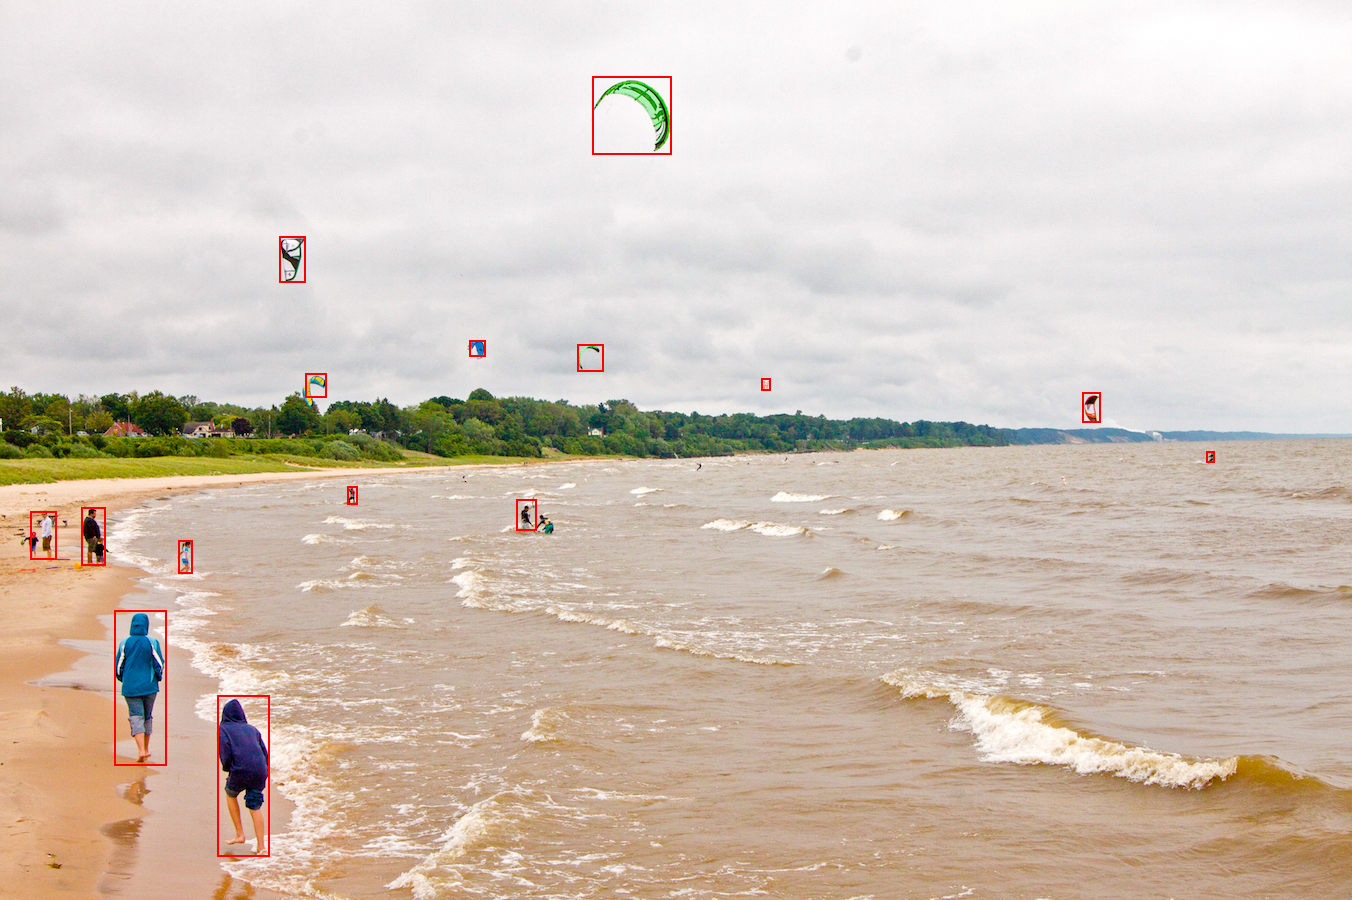

In [20]:
img